In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# !pip install -qqq pydotplus
!pip install imbalanced-learn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O| (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from collections import Counter


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [2]:
def get_dummies_encoder(df, cols):
    return pd.get_dummies(df, columns=cols)

def sklearn_encoder(df, cols):
    encoder = OneHotEncoder(sparse=False)

    one_hot_encoded_dfs = []

    for col_name in cols:
        col_reshaped = df[col_name].values.reshape(-1, 1)
        one_hot_encoded = encoder.fit_transform(col_reshaped)

        one_hot_encoded_df = pd.DataFrame(
            one_hot_encoded,
            columns=encoder.get_feature_names_out([col_name]),
            index=df.index,
        )

        one_hot_encoded_dfs.append(one_hot_encoded_df)

    df_encoded = pd.concat([df] + one_hot_encoded_dfs, axis=1)
    df_encoded.drop(cols, axis=1, inplace=True)

    return df_encoded

In [3]:
def get_metrics(y_pred, y_test):
    value_counts = Counter(y_pred)

    print("Count of unique values in y_pred:")
    for value, count in value_counts.items():
        print(f"{value}: {count}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    print("confusion matrix")
    print(f"tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}\n")
    
    report = classification_report(y_test, y_pred, output_dict=True)
    # Format and print the classification report
    print("Classification Report:")
    print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Class", "Precision", "Recall", "F1-Score", "Support"))
    for class_label, metrics in report.items():
        if class_label in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        print("{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15}".format(class_label, 
                                                                    metrics['precision'], 
                                                                    metrics['recall'], 
                                                                    metrics['f1-score'], 
                                                                    metrics['support']))
    print("\n\n")

In [4]:
def fit_and_predict(df, model):
    X = df.drop('No-show', axis=1)
    y = df['No-show']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print("METRICS")
    get_metrics(y_pred, y_test)

In [5]:
def get_class_distribution(df, col):
    
    # Count occurrences of each class
    class_distribution = df[col].value_counts()

    # Visualize class distribution
    plt.figure(figsize=(6, 4))
    class_distribution.plot(kind='bar', color=['blue', 'red'])
    plt.title('Class Distribution of No-show')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Show', 'No-show'], rotation=0)
    plt.show()

    # Print class distribution counts
    print("Class Distribution:")
    print(class_distribution)

    print(class_distribution[1]/class_distribution[0])

In [6]:
df=pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

In [7]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['Difference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [9]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Difference
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40


In [10]:
df = df[df['Difference'] >= 0]

In [11]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Difference
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40


In [12]:
# df.drop(index=99832, inplace=True)

df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay'],inplace=True,axis=1)
df.drop(['Neighbourhood'],inplace=True,axis=1)

df.rename(columns={'Hipertension':'Hypertension'},inplace=True)

df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

cols_to_encode = ["Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received", "Gender"]

df = get_dummies_encoder(df, cols_to_encode)

/tmp/ipykernel_18/938893851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay'],inplace=True,axis=1)
/tmp/ipykernel_18/938893851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Neighbourhood'],inplace=True,axis=1)
/tmp/ipykernel_18/938893851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Hipertension':'Hypertension'},inplace=Tru

In [13]:
df.duplicated()

5         False
6         False
7         False
9         False
10        False
          ...  
110522     True
110523     True
110524     True
110525     True
110526     True
Length: 71959, dtype: bool

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df

,Age,No-show,Difference,Scholarship_0,Scholarship_1,Hypertension_0,Hypertension_1,Diabetes_0,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1,Gender_F,Gender_M
5,76,0,1,True,False,False,True,True,False,True,False,True,False,False,False,False,True,False,True,False
6,23,1,1,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False
7,39,1,1,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False
9,19,0,1,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False
10,30,0,1,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110479,34,1,37,False,True,True,False,True,False,True,False,True,False,False,False,False,False,True,True,False
110480,51,0,46,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True,True,False
110482,43,1,37,False,True,True,False,True,False,True,False,True,False,False,False,False,False,True,True,False
110496,37,1,1,True,False,False,True,True,False,True,False,True,False,False,False,False,True,False,True,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33539 entries, 5 to 110515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             33539 non-null  int64
 1   No-show         33539 non-null  int64
 2   Difference      33539 non-null  int64
 3   Scholarship_0   33539 non-null  bool 
 4   Scholarship_1   33539 non-null  bool 
 5   Hypertension_0  33539 non-null  bool 
 6   Hypertension_1  33539 non-null  bool 
 7   Diabetes_0      33539 non-null  bool 
 8   Diabetes_1      33539 non-null  bool 
 9   Alcoholism_0    33539 non-null  bool 
 10  Alcoholism_1    33539 non-null  bool 
 11  Handcap_0       33539 non-null  bool 
 12  Handcap_1       33539 non-null  bool 
 13  Handcap_2       33539 non-null  bool 
 14  Handcap_3       33539 non-null  bool 
 15  Handcap_4       33539 non-null  bool 
 16  SMS_received_0  33539 non-null  bool 
 17  SMS_received_1  33539 non-null  bool 
 18  Gender_F        33539 non-null

In [18]:
df.describe()

,Age,No-show,Difference
count,33539.000000,33539.000000,33539.000000
mean,42.545872,0.365276,20.440890
std,23.166369,0.481515,19.526146
min,0.000000,0.000000,0.000000
25%,24.000000,0.000000,6.000000
50%,44.000000,0.000000,15.000000
75%,60.000000,1.000000,29.000000
max,115.000000,1.000000,178.000000


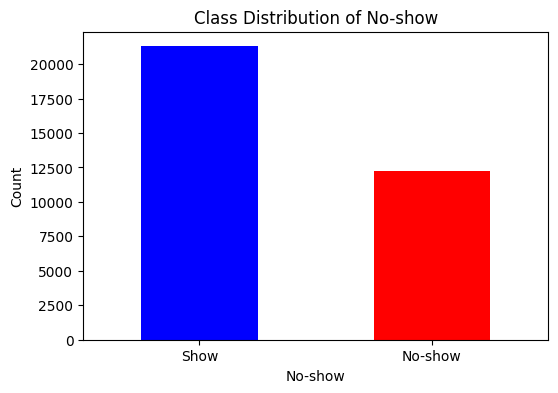

Class Distribution:
No-show
0    21288
1    12251
Name: count, dtype: int64
0.575488538143555


In [19]:
get_class_distribution(df, 'No-show')

In [20]:
scaler = MinMaxScaler()

age_column = df['Age'].values.reshape(-1, 1)
normalized_age = scaler.fit_transform(age_column)
df['Age'] = normalized_age

# diff_col = df["Difference"].values.reshape(-1, 1)
# normalized_diff = scaler.fit_transform(diff_col)
# df["Difference"] = normalized_diff

In [21]:
unique_values_with_counts = df['Difference'].value_counts()

print(unique_values_with_counts)

df.describe()

Difference
3      1689
6      1434
5      1406
4      1327
1      1269
       ... 
81        1
126       1
125       1
150       1
122       1
Name: count, Length: 128, dtype: int64


,Age,No-show,Difference
count,33539.000000,33539.000000,33539.000000
mean,0.369964,0.365276,20.440890
std,0.201447,0.481515,19.526146
min,0.000000,0.000000,0.000000
25%,0.208696,0.000000,6.000000
50%,0.382609,0.000000,15.000000
75%,0.521739,1.000000,29.000000
max,1.000000,1.000000,178.000000


In [22]:
missing_values = df.isna().sum()
missing_values

Age               0
No-show           0
Difference        0
Scholarship_0     0
Scholarship_1     0
Hypertension_0    0
Hypertension_1    0
Diabetes_0        0
Diabetes_1        0
Alcoholism_0      0
Alcoholism_1      0
Handcap_0         0
Handcap_1         0
Handcap_2         0
Handcap_3         0
Handcap_4         0
SMS_received_0    0
SMS_received_1    0
Gender_F          0
Gender_M          0
dtype: int64

Class Distribution after SMOTE:
No-show
0    21288
1    17030
Name: count, dtype: int64


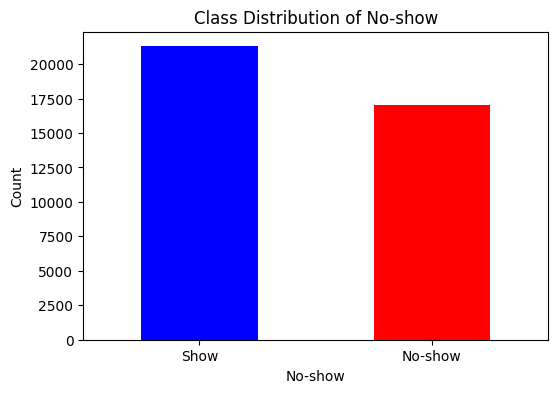

Class Distribution:
No-show
0    21288
1    17030
Name: count, dtype: int64
0.7999812100714018


In [23]:
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is named df and target variable is 'No-show'

# Separate features and target variable
X = df.drop('No-show', axis=1)
y = df['No-show']

# Instantiate SMOTE
smote = SMOTE(sampling_strategy=0.8, random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame if necessary
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='No-show')], axis=1)

# Check class distribution after resampling
print("Class Distribution after SMOTE:")
print(df_resampled['No-show'].value_counts())

get_class_distribution(df_resampled, 'No-show')

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


models = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), GaussianNB()]


for model in models:
    fit_and_predict(df_resampled, model)

METRICS
Count of unique values in y_pred:
1: 4822
0: 6674
confusion matrix
tn: 3332, fp: 3059, fn: 3342, tp: 1763

Classification Report:
Class           Precision       Recall          F1-Score        Support        
0               0.50            0.52            0.51            6391           
1               0.37            0.35            0.36            5105           



METRICS
Count of unique values in y_pred:
0: 6834
1: 4662
confusion matrix
tn: 3410, fp: 2975, fn: 3424, tp: 1687

Classification Report:
Class           Precision       Recall          F1-Score        Support        
0               0.50            0.53            0.52            6385           
1               0.36            0.33            0.35            5111           



METRICS
Count of unique values in y_pred:
0: 8462
1: 3034
confusion matrix
tn: 4989, fp: 1403, fn: 3473, tp: 1631

Classification Report:
Class           Precision       Recall          F1-Score        Support        
0               0.59

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
